# VEHICLE PREDICTION

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
vehicle=pd.read_csv("C:/Users/PRADEEP PRIYA/Downloads/data.csv",na_values="?")

In [3]:
vehicle.head(5)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165.0,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150.0,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150.0,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140.0,3449,10.5,1970,ford torino,7.227443


In [4]:
vehicle.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'Kilometer_per_liter'],
      dtype='object')

# EDA

In [5]:
vehicle.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             6
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [6]:
vehicle.origin.unique()

array([1, 3, 2], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='origin', ylabel='count'>

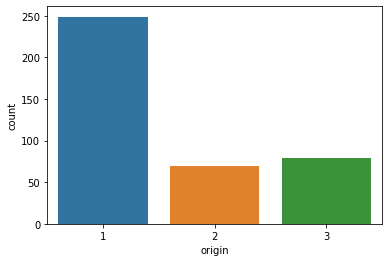

In [7]:
sns.countplot(vehicle.origin)

In [8]:
vehicle.cylinders.nunique()

5

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cylinders', ylabel='count'>

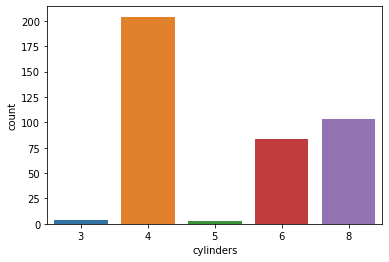

In [9]:
sns.countplot(vehicle.cylinders)

In [10]:
vehicle.displacement.describe()

count    398.000000
mean     193.425879
std      104.269838
min       68.000000
25%      104.250000
50%      148.500000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1b5be8cba30>,
 'caps': [<matplotlib.lines.Line2D at 0x1b5be8dd0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b5be8cb5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b5be8dd7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b5be8ddb80>],
 'means': []}

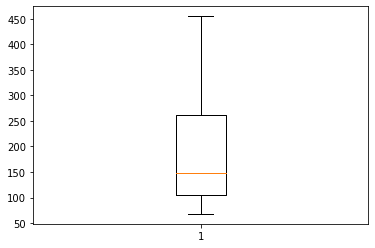

In [11]:
plt.boxplot(vehicle.displacement)

In [12]:
vehicle.horsepower.describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [13]:
vehicle.horsepower.fillna(vehicle.horsepower.mean(),inplace=True)

In [14]:
vehicle.horsepower.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1b5be951250>,
 'caps': [<matplotlib.lines.Line2D at 0x1b5be951970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b5be942e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1b5be95d0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b5be95d460>],
 'means': []}

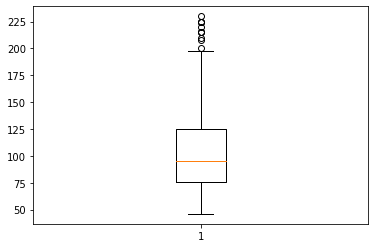

In [15]:
plt.boxplot(vehicle.horsepower)

C:\Users\PRADEE~1\AppData\Local\Temp/ipykernel_17324/2372742163.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle.horsepower[vehicle.horsepower>UE]=UE
C:\Users\PRADEE~1\AppData\Local\Temp/ipykernel_17324/2372742163.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle.horsepower[vehicle.horsepower<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x1b5be9caa00>,
 'caps': [<matplotlib.lines.Line2D at 0x1b5be9d4040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b5be9ca670>],
 'medians': [<matplotlib.lines.Line2D at 0x1b5be9d4760>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b5be9d4af0>],
 'means': []}

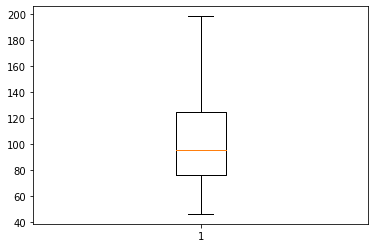

In [16]:
q3=vehicle.horsepower.quantile(0.75)
q1=vehicle.horsepower.quantile(0.25)
iqr=q3-q1
UE=q3+1.5*(iqr)
LE=q1-1.5*(iqr)
vehicle[(vehicle.horsepower<UE)&(vehicle.horsepower>LE)]
vehicle.horsepower[vehicle.horsepower>UE]=UE
vehicle.horsepower[vehicle.horsepower<LE]=LE
plt.boxplot(vehicle.horsepower)

In [17]:
vehicle.weight.describe()

count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Name: weight, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1b5bea2ee80>,
 'caps': [<matplotlib.lines.Line2D at 0x1b5bea385e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b5bea2eaf0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b5bea38d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b5bfa180d0>],
 'means': []}

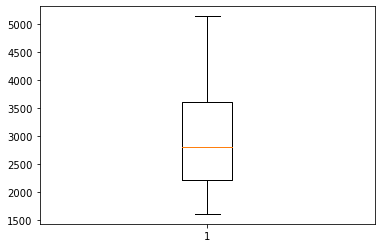

In [18]:
plt.boxplot(vehicle.weight)

In [19]:
vehicle.acceleration.describe()

count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: acceleration, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1b5bfa6fc40>,
 'caps': [<matplotlib.lines.Line2D at 0x1b5bfa7c3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b5bfa6f8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b5bfa7cac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b5bfa7ce50>],
 'means': []}

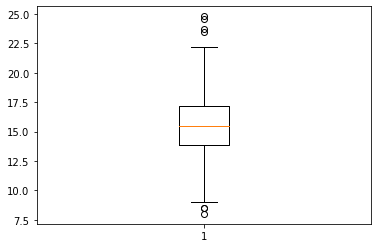

In [20]:
plt.boxplot(vehicle.acceleration)

C:\Users\PRADEE~1\AppData\Local\Temp/ipykernel_17324/875710041.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle.acceleration[vehicle.acceleration>UE]=UE
C:\Users\PRADEE~1\AppData\Local\Temp/ipykernel_17324/875710041.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle.acceleration[vehicle.acceleration<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x1b5bfaea280>,
 'caps': [<matplotlib.lines.Line2D at 0x1b5bfaea9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b5bfaddeb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b5bfaf7100>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b5bfaf7490>],
 'means': []}

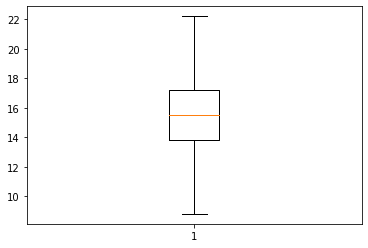

In [21]:
q3=vehicle.acceleration.quantile(0.75)
q1=vehicle.acceleration.quantile(0.25)
iqr=q3-q1
UE=q3+1.5*(iqr)
LE=q1-1.5*(iqr)
vehicle[(vehicle.acceleration<UE)&(vehicle.acceleration>LE)]
vehicle.acceleration[vehicle.acceleration>UE]=UE
vehicle.acceleration[vehicle.acceleration<LE]=LE
plt.boxplot(vehicle.acceleration)

In [22]:
vehicle.year.nunique()

13

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

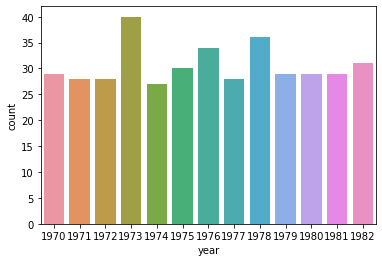

In [23]:
sns.countplot(vehicle.year)

In [24]:
vehicle.year.replace(["1971","1972"],"1971-1972",inplace=True)
vehicle.year.replace(["1979","1980","1981"],"1979-1981",inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

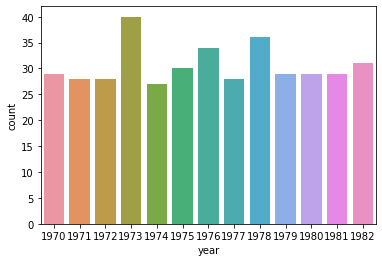

In [25]:
sns.countplot(vehicle.year)

In [26]:
vehicle.name.describe()

count            398
unique           305
top       ford pinto
freq               6
Name: name, dtype: object

In [27]:
vehicle.name.isnull().sum()

0

In [28]:
vehicle.Kilometer_per_liter.describe()

count    398.000000
mean       9.997073
std        3.322917
min        3.826293
25%        7.440015
50%        9.778305
75%       12.329168
max       19.811697
Name: Kilometer_per_liter, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1b5bfc7bf70>,
 'caps': [<matplotlib.lines.Line2D at 0x1b5bfc896d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b5bfc7bbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b5bfc89df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b5bfc951c0>],
 'means': []}

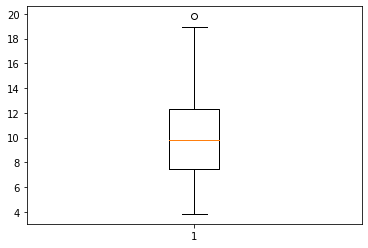

In [29]:
plt.boxplot(vehicle.Kilometer_per_liter)

In [30]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [31]:
vehicle.origin = vehicle.origin.astype(str)

In [32]:
vehicle.cylinders = vehicle.cylinders.astype(str)

In [33]:
vehicle.year = vehicle.year.astype(str)

In [34]:
vehicle.drop(["name"],axis=1,inplace=True)

# CREATING DUMMIES

In [35]:
dummies=pd.get_dummies(vehicle)

# SPLITTING TRAIN AND TEST

In [56]:
x=dummies.drop("Kilometer_per_liter",axis=1)
y=dummies.Kilometer_per_liter
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=12)

In [52]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x=scaler.fit_transform(test_x)


# MODEL

In [57]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [58]:
pred_y=model.predict(test_x)

# SCORE

In [59]:
score=model.score(test_x,test_y)
print("score using linear regression model:",score*100)

score using linear regression model: 91.22930385606149
